In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the original FBI hate crime statistical dataset

In [2]:
df = pd.read_csv("hate_crime.csv")

In [3]:
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226323,1445214,2021,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Lesbian (Female),Individual,S,S
226324,1445630,2021,WY0070200,Riverton,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
226325,1448544,2021,WY0190100,Green River,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Government/Public Building,Anti-American Indian or Alaska Native,Individual,S,S
226326,1448545,2021,WY0150000,Park,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Mental Disability,Individual,S,S


## Preprocess the DataFrame and Clean the Data

Filter only 2020 racial hate crimes as corresponding to my twitter dataset and google dataset

In [5]:
df = df.loc[df['data_year'] == 2020]

Change the type of incident_date from string to datetime

In [6]:
df['incident_date'] = pd.to_datetime(df['incident_date'])

Drop irrelevant columns in the DataFrame

In [7]:
df = df.drop(['ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'population_group_code',
              'adult_victim_count', 'juvenile_victim_count', 'adult_offender_count', 'juvenile_offender_count'], axis=1)

Reorganize the columns in the DataFrame according to importance

In [8]:
df = df.reindex(columns=['incident_id', 'incident_date', 'bias_desc', 'offense_name', 
                         'offender_race', 'offender_ethnicity', 'total_offender_count', 'victim_count',
                         'location_name', 'data_year', 'division_name', 'region_name', 'population_group_description', 
                         'total_individual_victims', 'victim_types', 'multiple_offense', 'multiple_bias'])

Set incident date as index column for time series analysis and sort by date

In [9]:
df = df.set_index('incident_date')
df = df.sort_index()

Filter anti-Asian hate crimes

In [10]:
df_asian = df[df['bias_desc'].str.contains('Asian')]
df_asian

,incident_id,bias_desc,offense_name,offender_race,offender_ethnicity,total_offender_count,victim_count,location_name,data_year,division_name,region_name,population_group_description,total_individual_victims,victim_types,multiple_offense,multiple_bias
incident_date,,,,,,,,,,,,,,,,
2020-01-01,1438195,Anti-Asian,Destruction/Damage/Vandalism of Property;Intim...,White,Not Hispanic or Latino,1,2,Convenience Store,2020,Mountain,West,"Cities under 2,500",1.0,Individual,M,S
2020-01-03,1438405,Anti-Asian,Destruction/Damage/Vandalism of Property,Not Specified,Not Specified,0,2,Convenience Store,2020,Pacific,West,"Cities from 500,000 thru 999,999",1.0,Business;Individual,S,S
2020-01-09,1436600,Anti-Asian,Intimidation,White,Not Hispanic or Latino,1,1,Industrial Site,2020,East South Central,South,"Cities from 25,000 thru 49,999",1.0,Individual,S,S
2020-01-11,1327148,Anti-Asian,Simple Assault,White,Unknown,1,1,Highway/Road/Alley/Street/Sidewalk,2020,South Atlantic,South,"Cities from 500,000 thru 999,999",1.0,Individual,S,S
2020-01-11,1442668,Anti-Asian,Intimidation,Black or African American,Not Hispanic or Latino,1,1,Residence/Home,2020,West South Central,South,"MSA counties 100,000 or over",1.0,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,1441462,Anti-Asian,Simple Assault,Unknown,Unknown,1,1,Convenience Store,2020,Pacific,West,"Cities from 100,000 thru 249,999",1.0,Individual,S,S
2020-12-23,1346443,Anti-Asian,Robbery,Unknown,Hispanic or Latino,3,2,Highway/Road/Alley/Street/Sidewalk,2020,Pacific,West,"Cities from 50,000 thru 99,999",2.0,Individual,S,S
2020-12-24,1262483,Anti-Asian,Simple Assault,White,Hispanic or Latino,1,1,Highway/Road/Alley/Street/Sidewalk,2020,Pacific,West,"Cities from 25,000 thru 49,999",1.0,Individual,S,S


### Calculate and visualize monthly-aggregated anti-Asian hate crimes

In [21]:
monthly_crimes = df.resample('MS').count()

In [22]:
monthly_crimes = monthly_crimes.rename(columns={'incident_id': 'incident_count'})
monthly_crimes = monthly_crimes.drop(['bias_desc', 'offense_name', 'offender_race', 'offender_ethnicity', 
                     'total_offender_count', 'victim_count', 'location_name', 'data_year', 
                     'division_name', 'region_name', 'population_group_description', 'total_individual_victims',
                     'victim_types', 'multiple_offense', 'multiple_bias'], axis=1)
monthly_crimes

,incident_count
incident_date,
2020-01-01,582
2020-02-01,614
2020-03-01,619
2020-04-01,490
2020-05-01,736
2020-06-01,1436
2020-07-01,1112
2020-08-01,1042
2020-09-01,926


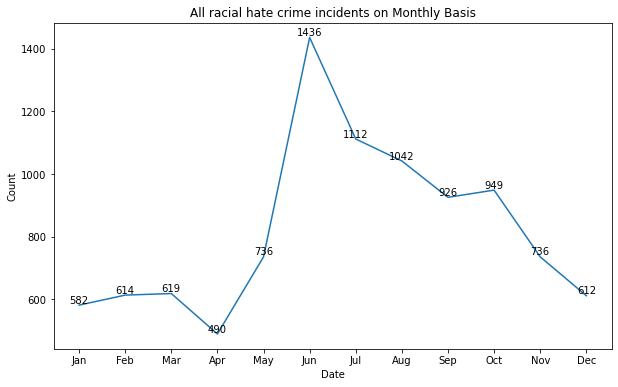

In [23]:
plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
crime_num = monthly_crimes.values
plt.plot(months, crime_num)

for i, count in enumerate(crime_num):
    plt.text(i, count[0], count[0], ha='center', va='bottom')

plt.title("All racial hate crime incidents on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [24]:
monthly_acrimes = df_asian.resample('MS').count()
monthly_acrimes = monthly_acrimes.rename(columns={'incident_id': 'incident_count'})
monthly_acrimes = monthly_acrimes.drop(['bias_desc', 'offense_name', 'offender_race', 'offender_ethnicity', 
                     'total_offender_count', 'victim_count', 'location_name', 'data_year', 
                     'division_name', 'region_name', 'population_group_description', 'total_individual_victims',
                     'victim_types', 'multiple_offense', 'multiple_bias'], axis=1)
monthly_acrimes

,incident_count
incident_date,
2020-01-01,18
2020-02-01,14
2020-03-01,55
2020-04-01,50
2020-05-01,44
2020-06-01,39
2020-07-01,26
2020-08-01,19
2020-09-01,29


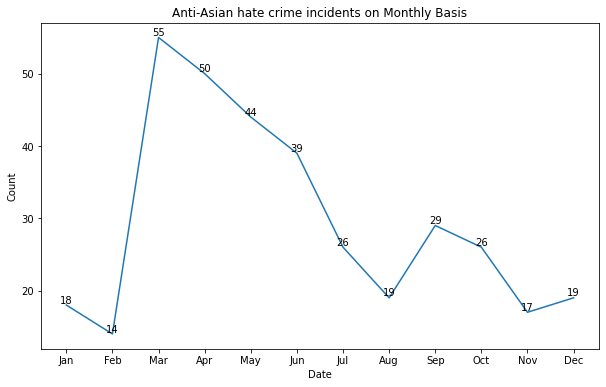

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(months, monthly_acrimes.values)

for i, count in enumerate(monthly_acrimes.values):
    plt.text(i, count[0], count[0], ha='center', va='bottom')

plt.title("Anti-Asian hate crime incidents on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

## Some Observation:
- Decrease in anti-Asian hate crimes after April
    - Changes in anti-Asian definition, police interference in response to the surge of social media hate sentiment?
    - Quanranteen: people cannot go out and commit hate crimes
    - Quanranteen: motivate people to take their anger out on the internet

- Crime number increases on August
    - Because quaranteen over?
    - Stop Asian Hate movement?

The initial hate crime might trigger the following explosive increase of hate crimes as the former normalize the latter

### Calculate basic summary statistics


In [33]:
monthly_mean = monthly_crimes.values.mean()
monthly_median = np.median(monthly_crimes.values)
monthly_std_dev = monthly_crimes.values.std()
monthly_range_min = monthly_crimes.values.min()
monthly_range_max = monthly_crimes.values.max()

print("All Racial Hate Crime Monthly Mean:", monthly_mean)
print("All Racial Hate Crime Monthly Median:", monthly_median)
print("All Racial Hate Crime Monthly Standard Deviation:", monthly_std_dev)
print("All Racial Hate Crime Monthly Range (min, max):", (monthly_range_min, monthly_range_max))

All Racial Hate Crime Monthly Mean: 821.1666666666666
All Racial Hate Crime Monthly Median: 736.0
All Racial Hate Crime Monthly Standard Deviation: 265.7727203625099
All Racial Hate Crime Monthly Range (min, max): (490, 1436)


In [34]:
monthly_mean = monthly_acrimes.values.mean()
monthly_median = np.median(monthly_acrimes.values)
monthly_std_dev = monthly_acrimes.values.std()
monthly_range_min = monthly_acrimes.values.min()
monthly_range_max = monthly_acrimes.values.max()

print("Anti-Asian Hate Crime Monthly Mean:", monthly_mean)
print("Anti-Asian Hate Crime Monthly Median:", monthly_median)
print("Anti-Asian Hate Crime Monthly Standard Deviation:", monthly_std_dev)
print("Anti-Asian Hate Crime Monthly Range (min, max):", (monthly_range_min, monthly_range_max))

Anti-Asian Hate Crime Monthly Mean: 29.666666666666668
Anti-Asian Hate Crime Monthly Median: 26.0
Anti-Asian Hate Crime Monthly Standard Deviation: 13.368703086770317
Anti-Asian Hate Crime Monthly Range (min, max): (14, 55)


### Time Series Analysis

Convert the number of anti-Asian hate crimes into time series object

In [35]:
weekly_antiasian_crimes = df_asian.resample('W').count()

In [36]:
weekly_antiasian_crimes.rename(columns={'incident_id': 'count'}, inplace=True)
weekly_antiasian_crimes = weekly_antiasian_crimes.drop(['bias_desc', 'offense_name', 'offender_race', 
                        'offender_ethnicity', 'total_offender_count', 'victim_count', 'location_name',
                        'data_year', 'division_name', 'region_name', 'population_group_description',
                        'total_individual_victims', 'victim_types', 'multiple_offense', 'multiple_bias'], axis=1)
weekly_antiasian_crimes

,count
incident_date,
2020-01-05,2
2020-01-12,4
2020-01-19,3
2020-01-26,2
2020-02-02,10
2020-02-09,3
2020-02-16,2
2020-02-23,3
2020-03-01,4


### Visualize weekly anti-Asian hate crime time series

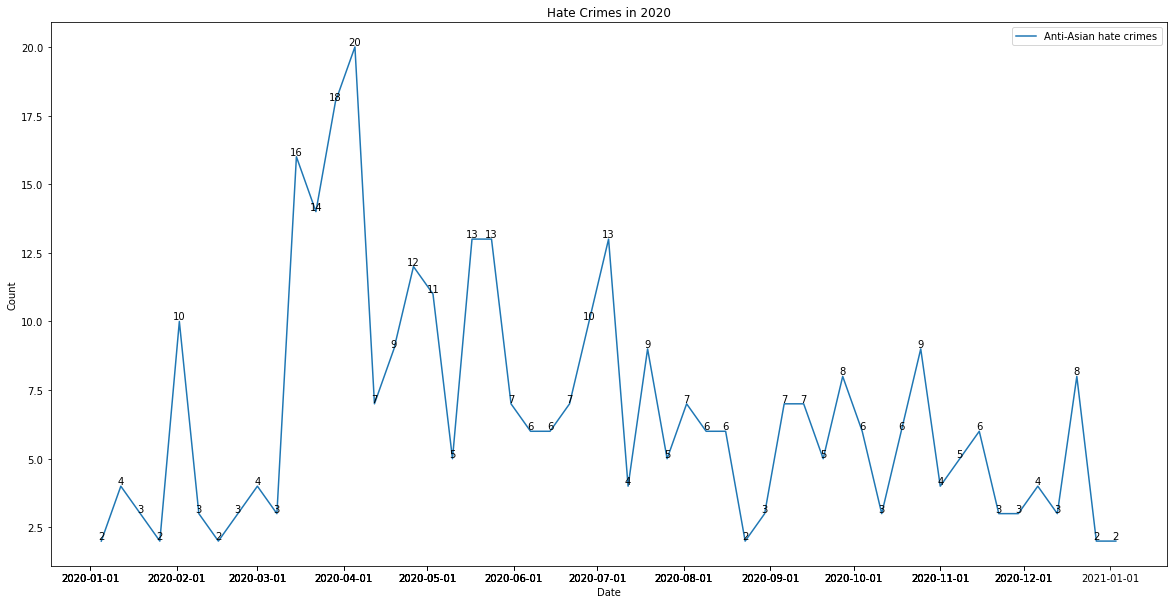

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(weekly_antiasian_crimes, label='Anti-Asian hate crimes')

for i, value in enumerate(weekly_antiasian_crimes.values):
    plt.text(weekly_antiasian_crimes.index[i], value[0], value[0], ha='center', va='bottom')


plt.xticks(weekly_antiasian_crimes.index.strftime('%Y-%m'))
plt.title('Hate Crimes in 2020')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [40]:
weekly_antiasian_crimes

,count
incident_date,
2020-01-05,2
2020-01-12,4
2020-01-19,3
2020-01-26,2
2020-02-02,10
2020-02-09,3
2020-02-16,2
2020-02-23,3
2020-03-01,4


In [51]:
import datetime

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


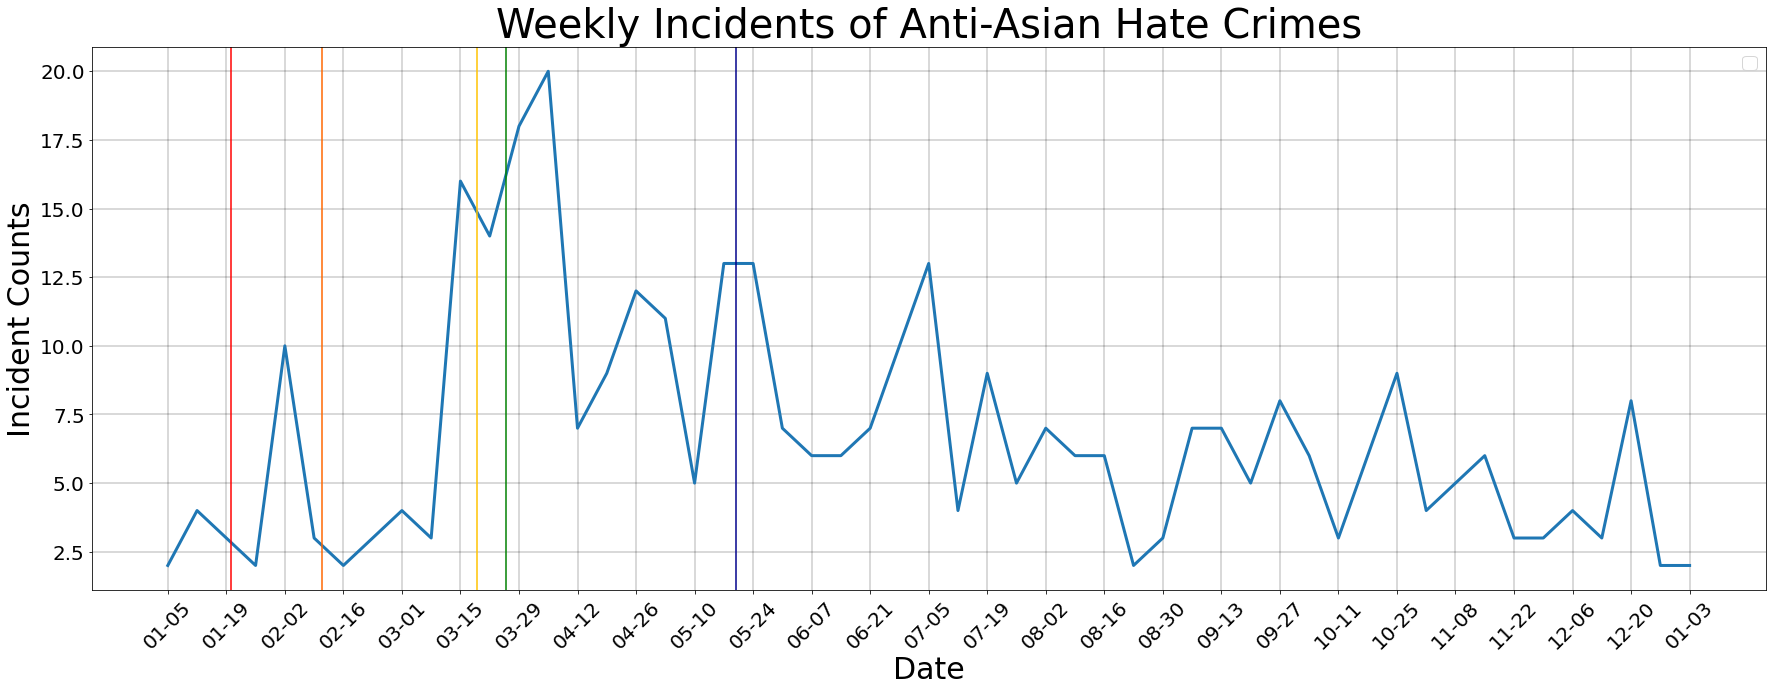

In [52]:
tick_positions = weekly_antiasian_crimes.index[::2] 
tick_labels = [d.strftime('%m-%d') for d in tick_positions]

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(weekly_antiasian_crimes.index, weekly_antiasian_crimes.values, lw=3)
ax.set_xlabel('Date', fontsize=30)
ax.set_ylabel('Incident Counts', fontsize=30)
ax.set_title('Weekly Incidents of Anti-Asian Hate Crimes', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)

plt.axvline(x=datetime.date(2020, 1, 20), color='red', linestyle='-')
plt.axvline(x=datetime.date(2020, 2, 11), color= '#FF6700', linestyle='-')
plt.axvline(x=datetime.date(2020, 3, 19), color= '#FFC300', linestyle='-')
plt.axvline(x=datetime.date(2020, 3, 26), color= 'green', linestyle='-')
plt.axvline(x=datetime.date(2020, 5, 20), color= '#00008B', linestyle='-')
plt.legend(fontsize=18)
ax.grid(True, linewidth=0.3, color='black')
plt.show()

<b>Check for stationarity</b>

In [43]:
from statsmodels.tsa.stattools import adfuller

# Conduct Dickey-Fuller test on the crime_ts time series
result = adfuller(weekly_antiasian_crimes)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print('The weekly crime time series is stationary.')
else:
    print('The weekly crime time series is not stationary.')

ADF Statistic: -4.146228377938567
p-value: 0.000811464890018812
The weekly crime time series is stationary.


In [46]:
weekly_antiasian_crimes.to_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_week_crime.csv')